# Predicting Customer Churn in Banking Institutions

Customer churn can be explained as the loss of users [1], which can negatively impact the bank's reputation and revenue [2]. Hence to prevent such consequences, predictive machine learning models can be used to identify potential patterns and relationship between the churn status (target variable) and feature variables so as to identify customers at risk of churning, and improve on influential factors before customers terminate their relationship with the bank.

**References:**
1) https://www.qualtrics.com/experience-management/customer/customer-churn/#:~:text=Customer%20churn%20is%20measured%20using,month%2C%20or%20a%20financial%20quarter.
2) https://www.sciencedirect.com/science/article/pii/S2666764923000401

## 1. Problem Definition
> What are the important factors that affect the decision of customers to stop using the bank's products and services?

## 2. Data

Dataset is obtained from https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset/data, which contains information on bank customers such as age, gender, credit score and their churn status (target variable). The dataset contains feature variables that can be used to analyse the influences on customer churning in banking institutions and can be used to build machine learning models to predict customers at risk of churning.

## 3. Evaluation 

This classification project will be evaluated using classification evaluation metrics:

* Precision - to determine how many of the predicted customers at risk of churning are true
* Recall - to determine how many customers who are churning are correctly identified
* F1-score - shows the overall performance in identifying customers at risk of churning
* ROC curve - to evaluate how the model is performing by comparing its true positive rate against its false positive rate
* ROC AUC score - shows the probability of the model in correctly identifying a customer at risk of churning

## 4. Features of data

The features within the dataset are as shown:

* RowNumber: The sequential number assigned to each row in the dataset
* CustomerId: A unique identifier for each customer
* Surname: The surname of the customer
* CreditScore: The credit score of the customer
* Geography: The geographical location of the customer (e.g., country or region)
* Gender: The gender of the customer
* Age: The age of the customer
* Tenure: The number of years the customer has been with the bank
* Balance: The account balance of the customer
* NumOfProducts: The number of bank products the customer has
* HasCrCard: Indicates whether the customer has a credit card (binary: yes/no)
* IsActiveMember: Indicates whether the customer is an active member (binary: yes/no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Indicates whether the customer has exited the bank (binary: yes/no) (churn status)

## 5. Building a classification model to predict customers at risk of churning

In [111]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [112]:
#Import data
df = pd.read_csv("data/Churn_Modelling.csv", index_col=0, low_memory=False)

#Check if df is successfully imported
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### A. Exploratory Data Analysis

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [114]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset does not contain any missing values but would require processing to convert the columns with object classes into numeric values before we can fit into the machine learning model.

In [115]:
#Check if outcome groups are balanced
pd.crosstab(df.Gender, df.Exited)

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


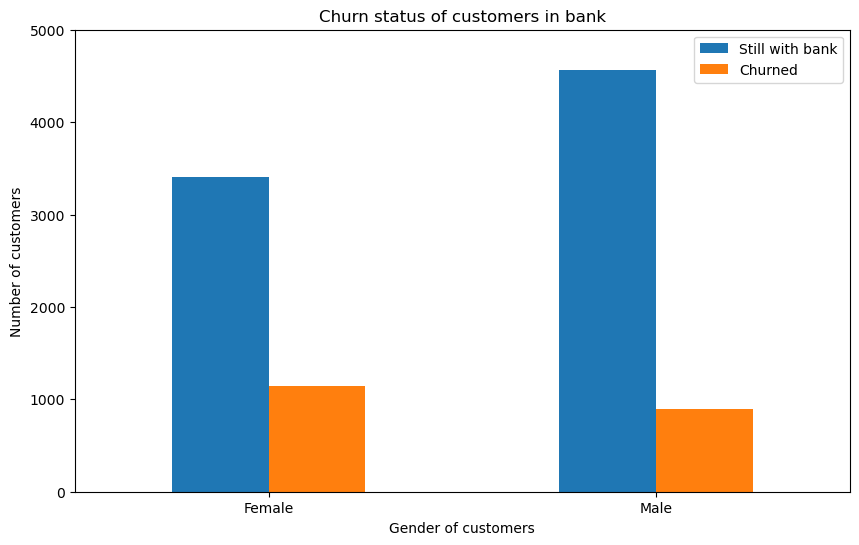

In [116]:
#Plot visualisation of crosstab
pd.crosstab(df.Gender, df.Exited).plot(figsize=(10,6),
                                       kind="bar")
plt.title("Churn status of customers in bank")
plt.xlabel("Gender of customers")
plt.ylabel("Number of customers")
plt.legend(["Still with bank", "Churned"])
plt.ylim([0,5000])
plt.xticks(rotation=0)
plt.plot();

The gender ratio of the dataset is balanced, with around 45% of the customers in the dataset being female and 55% of the customers being male. But the ratio of the outcome (Exited) is severely imbalanced (4:1), hence accuracy will not be used as an evaluation metric due to the presence of accuracy paradox where the model does not differentiate the correctly classified values of the different classes.

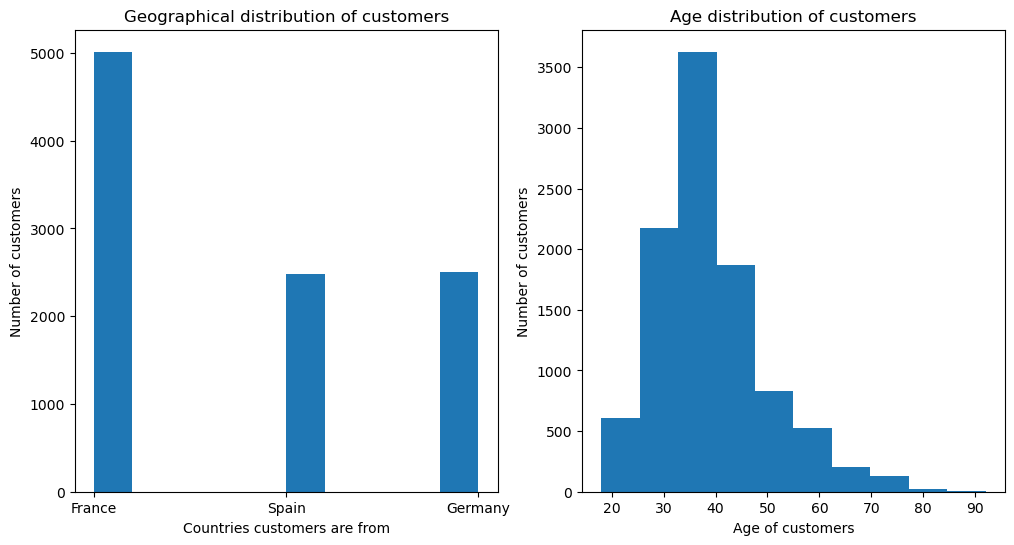

In [117]:
#Visualise the demographic of the sample dataset
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), nrows=1, ncols=2)

#Check geographical distribution of customers
ax1.hist(df.Geography, align="mid")
ax1.set(xlabel="Countries customers are from",
        ylabel="Number of customers",
        title="Geographical distribution of customers")

#Check age distribution of customers in dataset
ax2.hist(df.Age)
ax2.set(xlabel="Age of customers",
        ylabel="Number of customers",
        title="Age distribution of customers")

plt.show()

We can observe from the dataset that the customers in the dataset only come from 3 countries and the age distribution is quite focused around ages between 30 to 40, skewing to the right (positively skewed) and indicative of outliers towards the age of 90. Hence, the data should only be generalised to customers in France, Spain and Germany. The issue of outliers can be resolved with the use of machine learning models such as RandomForestClassifier (decision tree) and LogisticRegression model.

In [118]:
#Copy df as backup
df_tmp = df.copy()
df_tmp.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
len(df)

10000

### B. Data Processing

In [120]:
df.shape

(10000, 13)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [217]:
#Import model and tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay, roc_auc_score

#Define X and y
df_tmp = df_tmp.sample(frac=1, random_state=42) #Shuffle df
X = df_tmp.drop("Exited", axis=1)
y = df_tmp["Exited"]

#Split dataset into training, valid and test dataset (80/10/10 split)
X_train, X_valid, X_test = X[:8000], X[8000:9000], X[9000:]
y_train, y_valid, y_test = y[:8000], y[8000:9000], y[9000:]

In [218]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((8000, 12), (1000, 12), (1000, 12), (8000,), (1000,), (1000,))

Training, validation and test data split performed successfully.

In [219]:
X_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
4751,15597487,Hunter,850,France,Female,35,5,0.00,1,1,1,80992.80
5018,15777599,Esposito,746,Germany,Male,34,6,141806.00,2,1,1,183494.87
5210,15681126,Baker,702,Spain,Female,38,2,0.00,1,1,1,161888.63
9875,15671358,Fletcher,720,France,Male,44,4,0.00,2,1,0,163471.01
7947,15790448,Calabresi,473,France,Female,35,6,69617.36,1,1,0,143345.69



As the dataset contains non-numerical values, we have to convert them into numerical values before fitting into the model.

In [220]:
#Create function to transform data
def process_dataset(df):
    df_copy = df.copy()
    columns_to_process = ["Surname", "Geography", "Gender"]
    for label, content in df_copy.items():
        if label in columns_to_process:
            df_copy[label] = pd.Categorical(content).codes

    return df_copy

In [221]:
transformed_X_train = process_dataset(X_train)
transformed_X_valid = process_dataset(X_valid)
transformed_X_test = process_dataset(X_test)

In [222]:
transformed_X_train.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
4751,15597487,1093,850,0,0,35,5,0.00,1,1,1,80992.80
5018,15777599,725,746,1,1,34,6,141806.00,2,1,1,183494.87
5210,15681126,129,702,2,0,38,2,0.00,1,1,1,161888.63
9875,15671358,791,720,0,1,44,4,0.00,2,1,0,163471.01
7947,15790448,345,473,0,0,35,6,69617.36,1,1,0,143345.69
3990,15714256,869,666,0,1,30,7,109805.30,1,0,1,163625.56
3475,15778861,2433,720,2,1,33,6,97188.62,1,0,0,91881.29
2098,15689168,1654,531,2,1,37,1,143407.29,2,0,1,84402.46
5943,15695339,1421,517,1,1,53,0,109172.88,1,1,0,54676.10


In [223]:
X_train.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
4751,15597487,Hunter,850,France,Female,35,5,0.00,1,1,1,80992.80
5018,15777599,Esposito,746,Germany,Male,34,6,141806.00,2,1,1,183494.87
5210,15681126,Baker,702,Spain,Female,38,2,0.00,1,1,1,161888.63
9875,15671358,Fletcher,720,France,Male,44,4,0.00,2,1,0,163471.01
7947,15790448,Calabresi,473,France,Female,35,6,69617.36,1,1,0,143345.69
3990,15714256,Gerasimov,666,France,Male,30,7,109805.30,1,0,1,163625.56
3475,15778861,Wallace,720,Spain,Male,33,6,97188.62,1,0,0,91881.29
2098,15689168,Munro,531,Spain,Male,37,1,143407.29,2,0,1,84402.46
5943,15695339,Lucchesi,517,Germany,Male,53,0,109172.88,1,1,0,54676.10


We can observe that for the Gender column, Female is coded as 0 and Male is coded as 1 and for the Geography column, France is coded as 0, Germany is coded as 1 and Spain is coded as 2.

### C. Fit and score model

RandomForestClassifier is used because of its robustness against outliers, which is present in the dataset. This will reduce the influence of the outliers on the results.

In [224]:
#Instantiate the model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

#Fit model with data
rf_model.fit(transformed_X_train, y_train)

#Create function to fit and score model
def score_model(model, X_test=transformed_X_valid, y_test=y_valid):
    '''
    Scores model using precision, recall, F1 score and AUC score
    '''
    y_preds = model.predict(X_test)
    y_probs_positive = model.predict_proba(X_test)[:,1] #Extract probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
    rocplot = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name="RandomForestClassifier").plot();
    scores = {"Precision": round(precision_score(y_test, y_preds),2),
              "Recall": round(recall_score(y_test, y_preds),2),
              "F1-score": round(f1_score(y_test, y_preds),2),
              "ROC AUC Score": round(roc_auc_score(y_test, y_probs_positive),2)} #round all metrics to 2 d.p.
    return scores, rocplot

({'Precision': 0.76, 'Recall': 0.43, 'F1-score': 0.55, 'ROC AUC Score': 0.85}, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001F14B2D9550>)


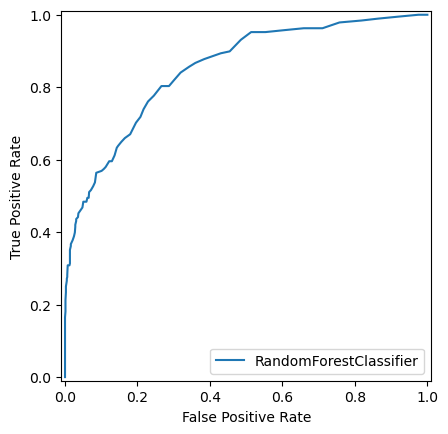

In [225]:
#Score model
rf_score = score_model(rf_model)
print(rf_score)

The evaluation metric stated the following:
* The precision score is 0.76, which indicates that the model is able to correctly predict 80% of customers at risk of churning. However, resources and inventions might be wasted on 24% of the identified customers as they are not at risk of churning, hence leading to unnecessary increases in marketing costs.
* The recall score is 0.43, which indicates that the model is only able to correctly identify 43% of customers at risk of churning. This is very significant as it means that the bank will not be able to provide interventions to the 57% of customers at risk of churning to attempt to change their minds. This can lead to revenue losses, as well as negatively impact the bank's reputation due to its inability to change the mind of the majority who have the intent of leaving.
* The F1 score is 0.55, which is not excellent and tuning of the model needs to be done to improve the recall score of the model, which will in turn improve the F1 score.
* The ROC AUC Score is 0.85, which indicates that the model will likely correctly identify a customer at risk of churning 85% of the time, which shows room for improvement.

## 6. Hyperparameter tuning

As the dataset is more than 1000, RandomizedSearchCV is used for hyperparameter tuning.

In [226]:
#Import tool
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42) #For reproducibility

#Define parameter grid
parameter_grid = {"n_estimators":np.arange(5,100,20),
                  "max_depth":[None]+list(np.arange(2, 20,2)),
                  "max_features": [None, "sqrt", "log2"],
                  "min_samples_split": np.arange(2,20,2),
                  "min_samples_leaf":np.arange(2, 20,2)}

rs_model = RandomizedSearchCV(rf_model,
                              param_distributions=parameter_grid,
                              n_iter=100,
                              n_jobs=-1,
                              cv=5,
                              verbose=2)

#Fit model with data
rs_model.fit(transformed_X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      14, 16, 18],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 5, 25, 45, 65, 85])},
                   verbose=2)

({'Precision': 0.75, 'Recall': 0.4, 'F1-score': 0.53, 'ROC AUC Score': 0.86}, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001F14C6AAD20>)


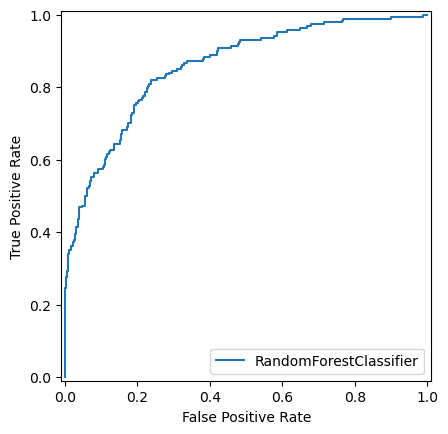

In [228]:
rs_score = score_model(rs_model)
print(rs_score)

Using the validation dataset, the untuned model, rf_model, showed better performance in correctly predicting (precision) and identifying customers (recall) at risk of churning than the tuned model, rs_model (0.76 vs 0.75, 0.43 vs 0.4), but the tuned model showed a higher probability of correctly identifying a customer at risk of churning (AUC score) (0.85 vs 0.86). 

({'Precision': 0.72, 'Recall': 0.46, 'F1-score': 0.56, 'ROC AUC Score': 0.86},
 <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x1f14b6a1a00>)

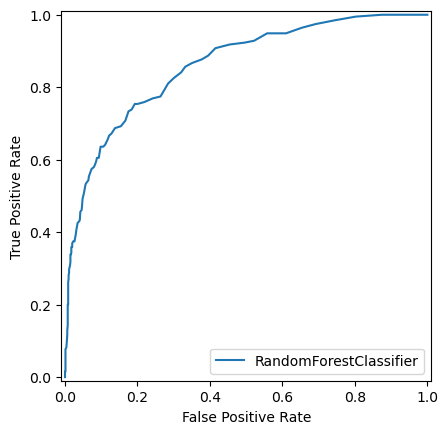

In [229]:
#Check performance of model using test dataset
score_model(rf_model, transformed_X_test, y_test)

({'Precision': 0.73, 'Recall': 0.43, 'F1-score': 0.54, 'ROC AUC Score': 0.87},
 <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x1f147beea50>)

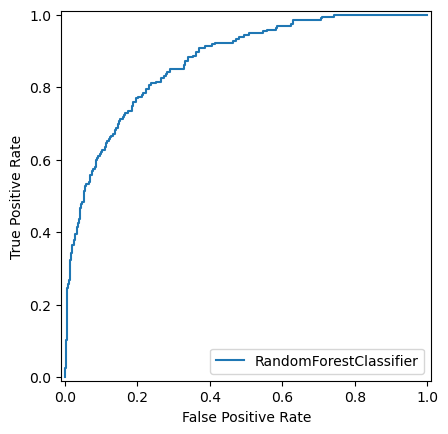

In [230]:
score_model(rs_model, transformed_X_test, y_test)

Using the test data, the untuned model shows better performance in terms of recall score, which indicates it was better at correctly identifying customers at risk of churn than the tuned model. 

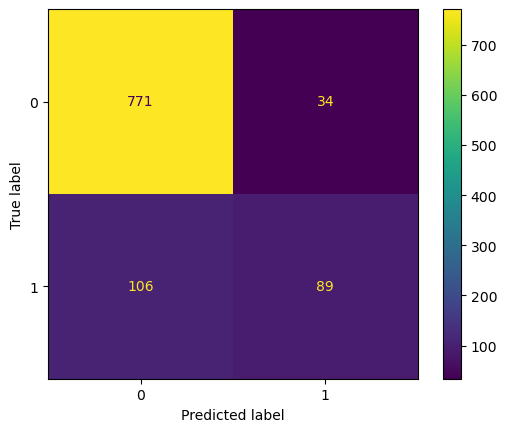

In [239]:
from sklearn.metrics import ConfusionMatrixDisplay

#Check confusion matrix of untuned model
rf_matrix = ConfusionMatrixDisplay.from_estimator(rf_model, X=transformed_X_test, y=y_test)

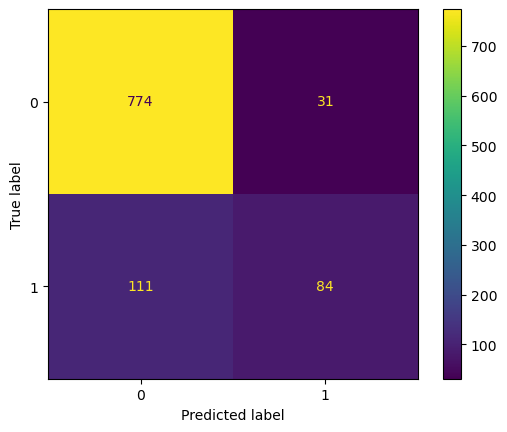

In [240]:
#Check confusion matrix of tuned model
rs_matrix = ConfusionMatrixDisplay.from_estimator(rs_model, X=transformed_X_test, y=y_test)

The confusion matrix display of both models showed similar performances and referencing the scores of both models.

## 7. Conclusion
With the importance of correctly identifying customers who are at risk of churning, the untuned model, rf_model, should be used to predict customer churn status due to its higher recall score, as compared to the tuned model, rs_model. But more tuning of the model should be performed to improve its ability to correctly identify customers at risk, in order to carry out measures to stop customers from terminating their relationship with the bank before it is too late. Hence, rf_model will be exported for use using the joblib module.

**Export model**

In [242]:
import joblib

In [243]:
joblib.dump(rf_model, filename="churn_status_predictor_1.joblib")

['churn_status_predictor_1.joblib']

## 8. Limitations and Future work

- The features in the dataset are quite limited and only consist of information such as the number of products and tenure, omitting experiential factors that can lead to customer churning. The data can be expanded to include features such as the customer's experience towards the bank's products and services and the number of complaints or issues they have with the bank. The increase in features could lead to the discovery of patterns that are not present in the current dataset and improve the model's performance in identifying customers churning.
- As the dataset only contains customers from France, Spain and Germany, we might not be able to apply the model to customers from countries in geographical regions with vastly different consumer behaviours. For example, customers from Asia might have different characteristics than the customers that came from the countries in the dataset such as lower salary or different spending behaviour.